In [86]:
import cv2
import os
import numpy as np
from IPython.display import display, Image

In [87]:
video = cv2.VideoCapture("video.mp4")
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total number of frames: {total_frames}")

total number of frames 149


In [88]:
count = 1
for i in range(total_frames):
    success, image = video.read()
    if i % 5 != 0:
        continue
    cv2.imwrite(f"frames/frame{count}.jpg", image)
    count += 1
    if count > 30:
        break

In [89]:
input_folder = "frames"
target_width = 400
target_height = 600
images = []

for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(input_folder, filename)
        original_image = cv2.imread(image_path)
        resized_image = cv2.resize(original_image, (target_width, target_height))
        grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        images.append(grayscale_image.flatten())       

In [90]:
H = np.array(images)
H = H.T
H.shape

(240000, 30)

In [91]:
column_means = np.mean(H, axis=0)
A = H - column_means

In [92]:
eigenvalues, eigenvectors = np.linalg.eig(A.T @ A)

In [93]:
max_eigenvalue_index = np.argmax(eigenvalues)
max_eigenvalue = eigenvalues[max_eigenvalue_index]
max_eigenvector = eigenvectors[:, max_eigenvalue_index]
print(f"Max eigenvalue of A.T @ A (and A @ A.T): {max_eigenvalue}")
print(f"Max eigenvector of A.T @ A: {max_eigenvector}")
max_eigenvector = A @ max_eigenvector
print(f"Max eigenvector of A @ A.T: {max_eigenvector}")

Max eigenvalue of A.T @ A (and A @ A.T): 14188464311.893139
Max eigenvector of A.T @ A: [-0.15520036 -0.19355519 -0.16217523 -0.19630848 -0.17715299 -0.18741299
 -0.17624283 -0.18883322 -0.1835565  -0.17213724 -0.18113184 -0.17940235
 -0.18187877 -0.18649029 -0.18290519 -0.18743719 -0.19164497 -0.17858641
 -0.17393433 -0.19520554 -0.17471054 -0.19323633 -0.18978027 -0.18428045
 -0.19774399 -0.19145442 -0.17088621 -0.17491414 -0.19654478 -0.16314983]
Max eigenvector of A @ A.T: [725.34193028 673.42061716 562.31145202 ... 516.2942547  609.55462126
 720.69021795]


In [94]:
min_eigenvalue_index = np.argmin(eigenvalues)
min_eigenvalue = eigenvalues[min_eigenvalue_index]
min_eigenvector = eigenvectors[:, min_eigenvalue_index]
print(f"Min eigenvalue of A.T @ A (and A @ A.T): {min_eigenvalue}")
print(f"Min eigenvector of A.T @ A: {min_eigenvector}")
min_eigenvector = A @ min_eigenvector
print(f"Min eigenvector of A @ A.T: {min_eigenvector}")

Min eigenvalue of A.T @ A (and A @ A.T): 145880.14896168714
Min eigenvector of A.T @ A: [-1.76188175e-03 -6.07511885e-05 -9.11931965e-03 -1.04122106e-02
 -9.26234768e-03  1.00666832e-03 -4.35896699e-03  3.34191395e-03
 -3.68898918e-03 -1.99309216e-03 -1.23339778e-01  2.42341361e-03
  1.28021975e-02 -5.49015658e-01  2.51570391e-01 -4.68169856e-01
  3.48515884e-01  3.51569961e-01  4.27216210e-04  3.35999388e-01
  2.28886917e-04 -1.47628953e-01 -1.12076944e-01  8.10265430e-02
  3.38030961e-03  3.71420427e-02  1.05646382e-02  2.69850840e-03
 -2.65432761e-03  1.04597859e-03]
Min eigenvector of A @ A.T: [-0.7620274   2.20133294  1.38292192 ... -0.62037434 -0.67863392
 -0.04702829]


In [95]:
def convert_array_to_image(vector):
    flattened_array = np.array(vector, dtype=np.uint8)
    desired_size = (600, 400) 
    reshaped_image = flattened_array.reshape(desired_size)
    display(Image(data=cv2.imencode('.png', reshaped_image)[1].tobytes()))

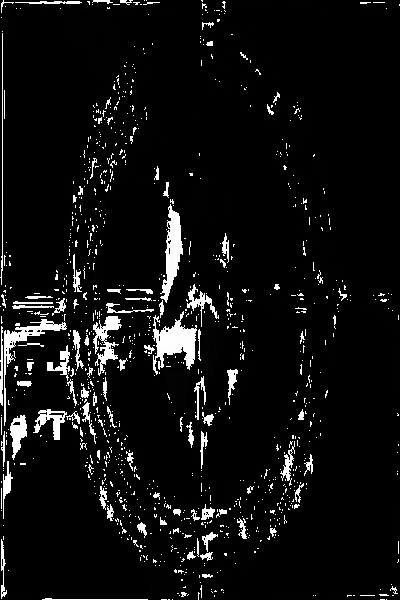

In [96]:
convert_array_to_image(min_eigenvector)

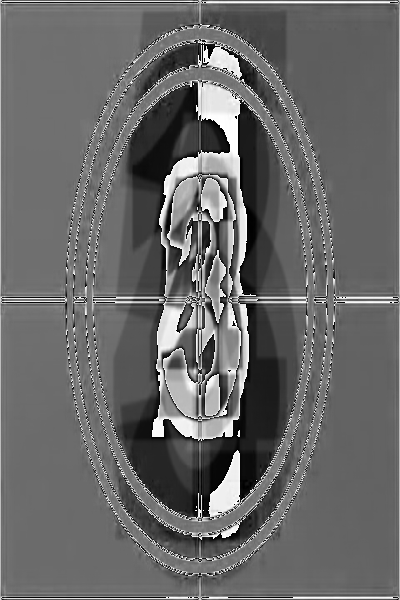

In [97]:
convert_array_to_image(max_eigenvector)